# Constant Concentration Phase Diagram

In [1]:
using Maxima
using PyPlot
using Interact
using PhaseDiagrams
using Optim

INFO: Recompiling stale cache file /home/nsmith/.julia/lib/v0.5/DataStructures.ji for module DataStructures.


Connecting Maxima to server on port 8080


INFO: Recompiling stale cache file /home/nsmith/.julia/lib/v0.5/Optim.ji for module Optim.


## Ideal Free Energy

Below we use symbolic computations and metaprogramming to construct methods for ideal free energy of the liquid, triangle and stripe phases of the model

In [2]:
f_ideal = m"n^2/2 - η*n^3/6 + χ*n^4/12"

 
                                4      3      2
                               n  χ   n  η   n
                               ---- - ---- + --
                                12     6     2

In [3]:
n = m"n0 + 2*A*n1"
f_ideal = subst(n, :n, f_ideal)

 
                          4                  3                  2
             (2 A n1 + n0)  χ   (2 A n1 + n0)  η   (2 A n1 + n0)
             ---------------- - ---------------- + --------------
                    12                 6                 2

In [4]:
f_ideal = expand(f_ideal)

 
    4   4        3      3                            3          4
 4 A  n1  χ   8 A  n0 n1  χ      2   2   2     2 A n0  n1 χ   n0  χ
 ---------- + ------------- + 2 A  n0  n1  χ + ------------ + -----
     3              3                               3          12
      3   3                                    3                              2
   4 A  n1  η      2      2         2        n0  η      2   2               n0
 - ---------- - 2 A  n0 n1  η - A n0  n1 η - ----- + 2 A  n1  + 2 A n0 n1 + ---
       3                                       6                             2

In [5]:
n1_liq = m"0.0"
n1_triangle = m"cos(4*%pi/sqrt(3)*(sqrt(3)*x/2 - y/2)) + 
                cos(4*%pi/sqrt(3)*(sqrt(3)*x/2 + y/2)) + 
                cos(4*%pi/sqrt(3)*y)"
n1_stripe = m"cos(4*%pi/sqrt(3)*y)"
f_liq = subst(n1_liq, :n1, f_ideal)
f_tri = subst(n1_triangle, :n1, f_ideal)
f_str = subst(n1_stripe, :n1, f_ideal);

In [6]:
f_liq = MExpr("integrate(integrate($f_liq, x, 0, 1), y, 0, sqrt(3)/2)")
f_tri = MExpr("integrate(integrate($f_tri, x, 0, 1), y, 0, sqrt(3)/2)")
f_str = MExpr("integrate(integrate($f_str, x, 0, 1), y, 0, sqrt(3)/2)");

In [7]:
f_liq = mcall(f_liq)
f_tri = mcall(f_tri)
f_str = mcall(f_str);

In [8]:
f_liq = ratsimp(f_liq)
f_liq = "$f_liq/(sqrt(3)/2)" |> MExpr |> mcall
f_liq = ratsimp(f_liq)
f_liq = float(f_liq)
f_liq = expand(f_liq);

In [9]:
f_tri = ratsimp(f_tri)
f_tri = "$f_tri/(sqrt(3)/2)" |> MExpr |> mcall
f_tri = ratsimp(f_tri)
f_tri = float(f_tri)
f_tri = expand(f_tri);

In [10]:
f_str = ratsimp(f_str)
f_str = "$f_str/(sqrt(3)/2)" |> MExpr |> mcall
f_str = ratsimp(f_str)
f_str = float(f_str)
f_str = expand(f_str);

In [11]:
F_liq_exp = parse(f_liq)
F_tri_exp = parse(f_tri)
F_str_exp = parse(f_str)
@eval F_ideal_liq(η, χ, n0) = $F_liq_exp
@eval F_ideal_tri(η, χ, n0, A) = $F_tri_exp
@eval F_ideal_str(η, χ, n0, A) = $F_str_exp

F_ideal_str (generic function with 1 method)

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(1.4, nactions=1),"η",1.4,"1.4",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…),Dict(1.2=>"1.2",2.0=>"2.0",1.5=>"1.5",1.4=>"1.4",1.6=>"1.6",1.9=>"1.9",1.1=>"1.1",1.3=>"1.3",1.8=>"1.8",1.7=>"1.7"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.09, nactions=1),"A",0.09,"0.09",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.01"=>0.01,"0.02"=>0.02,"0.03"=>0.03,"0.04"=>0.04,"0.05"=>0.05,"0.06"=>0.06,"0.07"=>0.07,"0.08"=>0.08,"0.09"=>0.09…),Dict(0.04=>"0.04",0.16=>"0.16",0.09=>"0.09",0.08=>"0.08",0.0=>"0.0",0.15=>"0.15",0.01=>"0.01",0.2=>"0.2",0.07=>"0.07",0.06=>"0.06"…)),Any[],Any[],true,"horizontal")

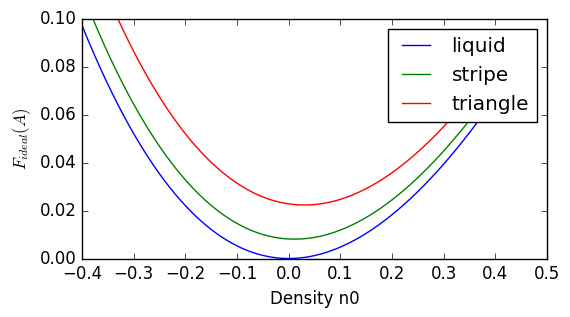

In [12]:
let
    n = linspace(-0.4, 0.4, 1000)
    ff = Array(Float64, 1000)
    f = figure(figsize=(6, 3))

    @manipulate for η in 1.0:0.1:2.0, A in 0.0:0.01:0.2
        withfig(f) do
            for i in 1:1000
                ff[i] = F_ideal_liq(η, 1.0, n[i])
            end
            plot(n, ff, label="liquid")
            for i in 1:1000
                ff[i] = F_ideal_str(η, 1.0, n[i], A)
            end
            plot(n, ff, label="stripe")
            for i in 1:1000
                ff[i] = F_ideal_tri(η, 1.0, n[i], A)
            end
            plot(n, ff, label="triangle")
            ylim(0, 0.1)
            legend()
            xlabel("Density n0")
            ylabel(L"F_{ideal}(A)")
        end
    end
end

## Excess Free Energy

Below we continue to use these techniques to compute the excess free energy!

In [13]:
# Correlation function
# Sorry for all those keyword arguments world
function C_eff( k, 
                c, 
                T;
                k′ = 2π,
                α = 0.8,
                β = 6.0,
                ρ = sqrt(3)/2.0,
                αc = 0.5,
                c₀ = 0.5)
    return c^2*exp(-T^2*k′^2/(2*β*ρ))*exp(-(k-k′)^2/(2*α^2))
end

C_eff (generic function with 1 method)

In [14]:
F_ex_tri(c, T, A; k = 2π) = -3.0 * A^2 * C_eff(k, c, T)
F_ex_str(c, T, A; k = 2π) = - A^2 * C_eff(k, c, T)

F_ex_str (generic function with 1 method)

## Total Free Energies

In [15]:
F_liq(η, χ, n0) = F_ideal_liq(η, χ, n0)

function F_tri(η, χ, n0, c, T)
    sol = optimize(A -> F_ideal_tri(η, χ, n0, A) + F_ex_tri(c, T, A), 0.0, 10.0)
    return sol.minimum
end

function F_str(η, χ, n0, c, T)
    sol = optimize(A -> F_ideal_str(η, χ, n0, A) + F_ex_str(c, T, A), 0.0, 10.0)
    return sol.minimum
end

F_str (generic function with 1 method)

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.49, nactions=1),"c",0.49,"0.49",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.01"=>0.01,"0.02"=>0.02,"0.03"=>0.03,"0.04"=>0.04,"0.05"=>0.05,"0.06"=>0.06,"0.07"=>0.07,"0.08"=>0.08,"0.09"=>0.09…),Dict(0.54=>"0.54",0.86=>"0.86",0.09=>"0.09",0.35=>"0.35",0.22=>"0.22",0.38=>"0.38",0.56=>"0.56",0.2=>"0.2",0.89=>"0.89",0.06=>"0.06"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.14, nactions=1),"T",0.14,"0.14",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.01"=>0.01,"0.02"=>0.02,"0.03"=>0.03,"0.04"=>0.04,"0.05"=>0.05,"0.06"=>0.06,"0.07"=>0.07,"0.08"=>0.08,"0.09"=>0.09…),Dict(0.3=>"0.3",0.04=>"0.04",0.26=>"0.26",0.16=>"0.16",0.09=>"0.09",0.08=>"0.08",0.25=>"0.25",0.0=>"0.0",0.28=>"0.28",0.22=>"0.22"…)),Any[],Any[],true,"horizontal")

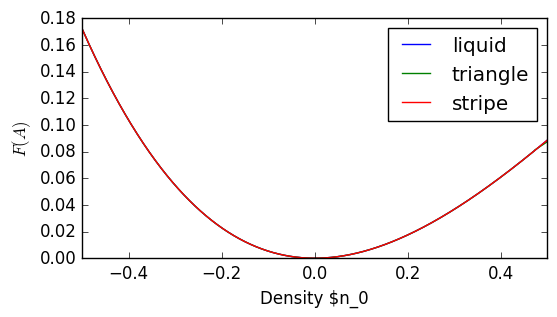

In [25]:
let
    N = 1000
    n0 = linspace(-0.5, 0.5, N)
    ff = Array(Float64, N)
    f = figure(figsize=(6, 3))
    @manipulate for c in 0.0:0.01:1.0, T in 0.0:0.01:0.3
        withfig(f) do
            for i in 1:N
                ff[i] = F_liq(2.0, 1.0, n0[i])
            end
            plot(n0, ff, label="liquid")
            for i in 1:N
                ff[i] = F_tri(2.0, 1.0, n0[i], c, T)
            end
            plot(n0, ff, label="triangle")
            for i in 1:N
                ff[i] = F_str(2.0, 1.0, n0[i], c, T)
            end
            plot(n0, ff, label="stripe")
            legend()
            xlim(-0.5, 0.5)
            xlabel(L"Density $n_0")
            ylabel(L"F(A)")
        end
    end
end

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(-0.001, nactions=1),"n0",-0.001,"-0.001",Interact.OptionDict(DataStructures.OrderedDict("-0.4"=>-0.4,"-0.399"=>-0.399,"-0.398"=>-0.398,"-0.397"=>-0.397,"-0.396"=>-0.396,"-0.395"=>-0.395,"-0.394"=>-0.394,"-0.393"=>-0.393,"-0.392"=>-0.392,"-0.391"=>-0.391…),Dict(-0.357=>"-0.357",0.259=>"0.259",0.117=>"0.117",0.221=>"0.221",-0.314=>"-0.314",-0.271=>"-0.271",0.171=>"0.171",0.061=>"0.061",-0.065=>"-0.065",-0.057=>"-0.057"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.49, nactions=1),"c",0.49,"0.49",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.01"=>0.01,"0.02"=>0.02,"0.03"=>0.03,"0.04"=>0.04,"0.05"=>0.05,"0.06"=>0.06,"0.07"=>0.07,"0.08"=>0.08,"0.09"=>0.09…),Dict(0.54=>"0.54",0.86=>"0.86",0.09=>"0.09",0.35=>"0.35",0.22=>"0.22",0.38=>"0.38",0.56=>"0.56",0.2=>"0.2",0.89=>"0.89",0.06=>"0.06"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.14, nactions=1),"T",0.14,"0.14",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.01"=>0.01,"0.02"=>0.02,"0.03"=>0.03,"0.04"=>0.04,"0.05"=>0.05,"0.06"=>0.06,"0.07"=>0.07,"0.08"=>0.08,"0.09"=>0.09…),Dict(0.3=>"0.3",0.04=>"0.04",0.26=>"0.26",0.16=>"0.16",0.09=>"0.09",0.08=>"0.08",0.25=>"0.25",0.0=>"0.0",0.28=>"0.28",0.22=>"0.22"…)),Any[],Any[],true,"horizontal")

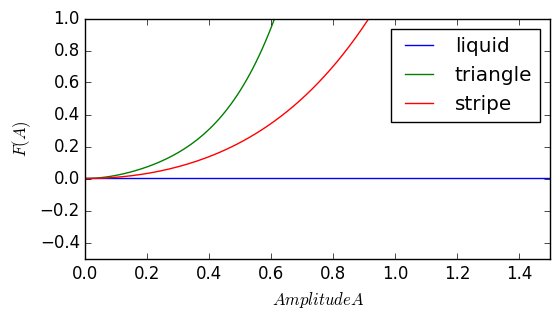

In [32]:
let
    N = 1000
    A = linspace(0.0, 10.0, N)
    ff = Array(Float64, N)
    f = figure(figsize=(6, 3))
    @manipulate for n0 in -0.4:0.001:0.4, c in 0.0:0.01:1.0, T in 0.0:0.01:0.3
        withfig(f) do
            for i in 1:N
                ff[i] = F_liq(2.0, 1.0, n0)
            end
            plot(A, ff, label="liquid")
            for i in 1:N
                ff[i] = F_ideal_tri(2.0, 1.0, n0, A[i]) + F_ex_tri(c, T, A[i])
            end
            plot(A, ff, label="triangle")
            for i in 1:N
                ff[i] = F_ideal_str(2.0, 1.0, n0, A[i]) + F_ex_str(c, T, A[i])
            end
            plot(A, ff, label="stripe")
            legend()
            xlim(0.0, 1.5)
            ylim(-0.5, 1.0)
            xlabel(L"Amplitude A")
            ylabel(L"F(A)")
        end
    end
end

## Phase Diagrams

In [52]:
function make_phase_diagram(nrnge, Trnge; c=0.95, η = 2.0, χ = 1.0)
    T_vals = Float64[]
    n_vals = Float64[]
    n = collect(nrnge)
    T = collect(Trnge)
    
    fliq = [F_liq(η, χ, n[i]) for i in 1:length(n)]
    ftri = similar(fliq)
    fstr = similar(fliq)
    
    for t in 1:length(T)
        for i in 1:length(n)
            ftri[i] = F_tri(η, χ, n[i], c, T[t])
            fstr[i] = F_str(η, χ, n[i], c, T[t])
        end
        arr = commontangent(fliq, ftri, fstr)
        for domain in arr
            for point in domain
                push!(T_vals, T[t])
                push!(n_vals, n[point])
            end
        end
    end
    return T_vals, n_vals
end

make_phase_diagram (generic function with 1 method)

In [74]:
nrange = -1.0:0.001:1.0
Trnge = 0.00:0.01:0.30

Tvals, nvals = make_phase_diagram(nrange, Trnge, c=0.80, η = 2.0)

([0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.01,0.02,0.02  …  0.28,0.28,0.29,0.29,0.29,0.29,0.3,0.3,0.3,0.3],[-0.077,0.363,0.553,0.835,-0.077,0.363,0.553,0.836,-0.076,0.364  …  0.615,0.858,0.082,0.457,0.619,0.86,0.092,0.463,0.623,0.861])

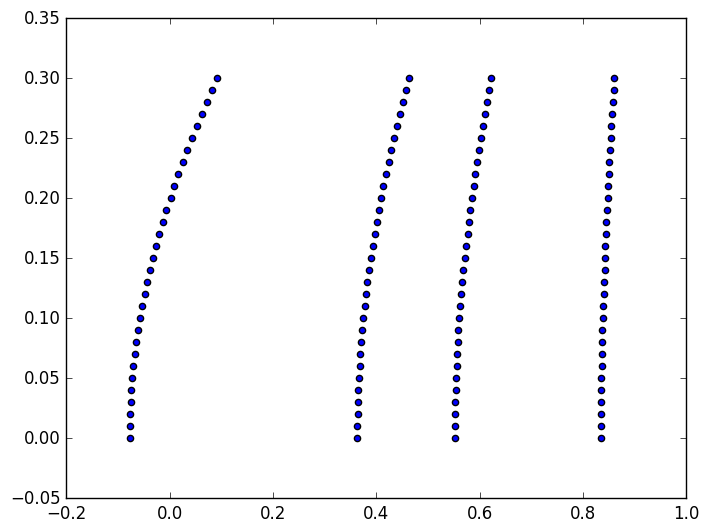

PyObject <matplotlib.collections.PathCollection object at 0x7f99896be910>

In [75]:
scatter(nvals, Tvals)
